In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
from LinearRegression import LinearRegression
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

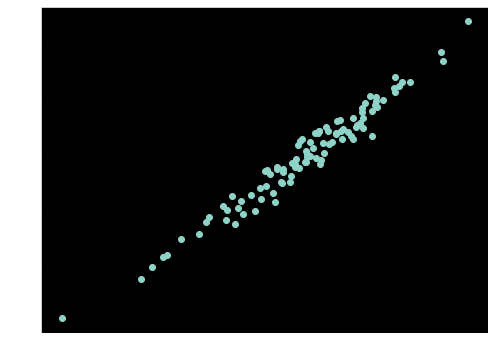

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
from lightphe import LightPHE

In [5]:
cs=LightPHE(algorithm_name="Paillier")

In [6]:
enc_X_train_rows=[]
for i in X_train:
    i=list(i)
    pt=cs.encrypt(i)
    enc_X_train_rows.append(pt)

In [7]:
len(enc_X_train_rows)

80

In [8]:
X_train_cols=X_train[:,0]

In [9]:
X_train_cols=list(X_train_cols)
X_train_cols

[0.036141936684072715,
 0.9849198419098969,
 0.018289191349219306,
 -0.12209157484767426,
 0.2152685809694434,
 -1.1909756947064645,
 -0.3126518960917129,
 0.5657383060625951,
 2.0078429507780005,
 0.30796885521603423,
 1.150035724719818,
 1.3919861934464073,
 -0.2026463246291819,
 0.16452954293239852,
 -0.9742363337673154,
 0.0395126866933667,
 0.6319794458091295,
 1.0459382556276653,
 0.21188338677770105,
 -3.5635166606247353,
 0.7673687357524115,
 1.4327069684260973,
 0.19342137647035826,
 1.0589691875711504,
 -2.4004536338122957,
 -0.5482424491868549,
 2.390960515463033,
 0.015696372114428918,
 -0.20849876310587975,
 0.405453411570191,
 -0.14461950836938436,
 -2.0212548201949705,
 -0.3999645806965225,
 0.8637172916848387,
 0.35402033219923795,
 -0.08194705182666534,
 0.5235079678938094,
 -0.4693052847058996,
 -0.5118813091268151,
 -1.5469055532292402,
 1.5456588046255575,
 1.3181515541801367,
 -0.5664459304649568,
 2.0306036208387996,
 -0.3978402281999914,
 -0.5847182112607883,
 -0

In [10]:
enc_X_train_cols=cs.encrypt(X_train_cols)

In [11]:
y_train_list=list(y_train)
enc_y_train=cs.encrypt(y_train_list)
enc_y_train

Fraction(+52256462983938598867646112826710385040959114124383460890139935531647626342580558607523844262154965899553636993442621717112502272845805561020496016735665559280076453700389389854707941035244131758725958038653831671586588633845852019336510590097729653889331360787791212852044970894849636720783638299613423240998600643299292906510815456752577855557519524500586228178913077892157516791587981646790595330118680777551601052457427195992855958556654764825893047859242847223381615355650057099662293547278150929179924489127340905595094991714606435576961983428636106497324359135594605316691298335752898112725180203057600085351 / 6137260785960549303507747138733191056648000279465246648292382013511874446134569613803179251662912753116295987259758700269909665583759102689649358058107951685297833169470762046417366911340617212089911759098838215417909888490579665695782894378625903844352915547762878113094013764815969399023339076131138105290117785362905907438913210518777445778902047776757757637473254581755

In [12]:
y_test_list=list(y_test)
enc_y_test=cs.encrypt(y_test_list)
enc_y_test

Fraction(-39588931235743522365114450472417299057687769651230378067254959522123402186638639616724464485905895128995377147729163480194231492832492285666057473474383924668149625476089456692318682627995059914990382649580178564668487683306220737326812634835938127297123244337369941825130527779529755924132161586703031055511625788924734120408426828256266997378457910148108686252319734317614065619043747560719780138140079653935262938271486810515093327368189424450517258313668245987889467739577280001829702739724558787239800235380654114271831651357615465174409020190705567446899310149254935399608388716179677794149765280249225551336 / 1247704836117232861150759118168789233611150731169930361666065882632348951360915797735989975040994875322597375748214121681221323426352746272504911724505921175683795315284283539365207363841648222948450642026491122131627372867136190206093162359623681904887950677883612839476125529291803481952136509829816684191668117641387293150745264825652660589018557474198289323023250242138

In [13]:
enc_X_test_rows=[]
for i in X_test:
    i=list(i)
    pt=cs.encrypt(i)
    enc_X_test_rows.append(pt)

In [14]:
len(enc_X_test_rows)

20

### fit function:

In [15]:
n_samples,n_features=X_train.shape
print(n_samples,n_features)

80 1


In [16]:
bias=0
var1=1/n_samples
n_iters=1000
lr=0.01
# weights as scalars:
w_a1=0

In [17]:
dot_prod=enc_X_train_cols*w_a1
dot_prod

Fraction(+1 / 28569936823901789728472317451287007740542645487257085237448457225111131142174655197522349174210807836801473825557353281057482080401376230331064452658354695302625020283082093669843866693868161649036297826049588673199750158261367566353119353823536066950235203813157011063289904870174879606547121274038185254536442513774832712506023421339444141830082225619365819367812184521313027755270364140624009430919315239201318362940511909386436565857977426199893869283715485719118263235522908972189740877640425756693206448794684760577798646236071448755091120133014183035095903286377864401692795051024869272551752988802186044393), Fraction(+1 / 1704946775637420437849911476308786939045442657085871971803330245791843706417978826089714235878181508745488205497275655409134971829410801261083787773898231221723181240101355800548366305711061924699071188408500938030213830094360583551331409344823351196671924343937142672422057046148105250151709391957723243772738831717802093727345908429784732635149248587902

In [18]:
bias_counts=[bias]*n_samples
bias_counts=cs.encrypt(bias_counts)

In [19]:
y_pred=dot_prod+bias_counts

In [20]:
test=cs.decrypt(y_pred)
test

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [21]:
y_train

array([   4.72571035,   37.3033147 ,    9.84617977,   -4.74696202,
         46.61433976,  -88.5636594 ,  -23.05085118,   49.30980232,
        187.11855381,   52.7868072 ,  100.63781242,  126.59136522,
        -34.92302734,   -2.39500665,  -91.54741375,   -1.32075177,
         44.66438206,  107.23095944,   45.28549362, -289.12699629,
         57.29982392,  132.7901884 ,   41.80672108,   88.76973989,
       -218.53325548,  -24.66035565,  241.89951823,  -10.13240956,
        -46.42718117,   25.64618465,  -13.50142554, -176.72441073,
        -18.66943338,   50.5672884 ,   22.64343207,  -21.09022538,
         64.92081242,  -64.87115989,  -31.48631679, -138.96811403,
        133.52911687,  122.17927892,  -53.50531413,  171.25986261,
        -21.98254439,  -26.36081393,   20.50476935,  -10.68145433,
         42.95199809,   24.1455885 , -179.69097653,  -69.72153699,
       -147.48591272,  -96.71683373,   37.07750059,   68.80268857,
        -18.61172071,   79.62314161,   52.56456985,   28.51154

In [22]:
def res_sum_fun(l):
    p=cs.decrypt(l)
    summation=0
    for i in p:
        summation+=i
    return summation

In [23]:
def minus_1_mul(l):
    l=cs.decrypt(l)
    j=[]
    for i in l:
        p=i*(-1)
        j.append(p)

    j=cs.encrypt(j)
    return j

In [24]:
enc_y_train_nve=minus_1_mul(enc_y_train)
test2=cs.decrypt(enc_y_train_nve)
test2

[-4.72571,
 -37.30331,
 -9.84617,
 4.74695,
 -46.61433,
 88.56364,
 23.05085,
 -49.3098,
 -187.11854,
 -52.78679,
 -100.63781,
 -126.59135,
 34.92302,
 2.395,
 91.5474,
 1.32075,
 -44.66438,
 -107.23095,
 -45.28549,
 289.12698,
 -57.29981,
 -132.79017,
 -41.80671,
 -88.76972,
 218.53325,
 24.66035,
 -241.8995,
 10.1324,
 46.42717,
 -25.64618,
 13.50141,
 176.72441,
 18.66942,
 -50.56727,
 -22.64342,
 21.09021,
 -64.92081,
 64.87115,
 31.4863,
 138.9681,
 -133.52911,
 -122.17927,
 53.50531,
 -171.25986,
 21.98254,
 26.36081,
 -20.50476,
 10.68144,
 -42.95199,
 -24.14557,
 179.69096,
 69.72153,
 147.4859,
 96.71683,
 -37.0775,
 -68.80267,
 18.61171,
 -79.62314,
 -52.56456,
 -28.51154,
 -107.68398,
 -31.89539,
 11.76894,
 -44.86892,
 113.47898,
 46.81998,
 -0.28973,
 -45.43319,
 -60.44071,
 13.86032,
 27.30975,
 117.65626,
 121.49963,
 -40.21307,
 95.50351,
 80.54746,
 -99.41132,
 71.52561,
 -115.32488,
 56.87386]

In [25]:
res=y_pred+enc_y_train_nve
test3=cs.decrypt(res)
test3

[8.047802410523649e+290,
 8.047802410523649e+290,
 8.047802410523649e+290,
 4.74695,
 8.047802410523649e+290,
 88.56364,
 23.05085,
 8.047802410523649e+290,
 8.047802410523649e+290,
 8.047802410523649e+290,
 8.047802410523649e+290,
 8.047802410523649e+290,
 34.92302,
 2.395,
 91.5474,
 1.32075,
 8.047802410523649e+290,
 8.047802410523649e+290,
 8.047802410523649e+290,
 289.12698,
 8.047802410523649e+290,
 8.047802410523649e+290,
 8.047802410523649e+290,
 8.047802410523649e+290,
 218.53325,
 24.66035,
 8.047802410523649e+290,
 10.1324,
 46.42717,
 8.047802410523649e+290,
 13.50141,
 176.72441,
 18.66942,
 8.047802410523649e+290,
 8.047802410523649e+290,
 21.09021,
 8.047802410523649e+290,
 64.87115,
 31.4863,
 138.9681,
 8.047802410523649e+290,
 8.047802410523649e+290,
 53.50531,
 8.047802410523649e+290,
 21.98254,
 26.36081,
 8.047802410523649e+290,
 10.68144,
 8.047802410523649e+290,
 8.047802410523649e+290,
 179.69096,
 69.72153,
 147.4859,
 96.71683,
 8.047802410523649e+290,
 8.0478

### FAIL